In [2]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict


In [3]:
import torch
import torch.nn as nn

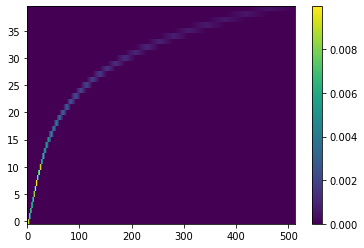

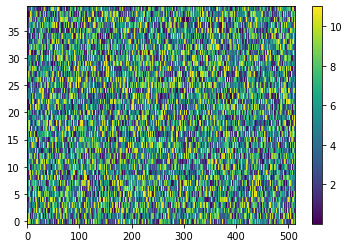

0.009978338 0.010251286 0.4876190476190476 0.023219954648526078


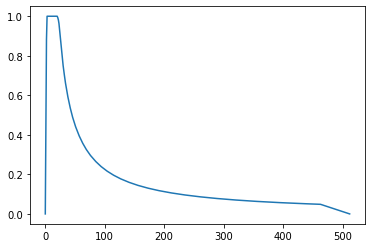

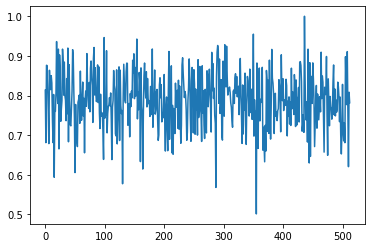

In [4]:
n_fft = 1024
n_mels = 40
sr = 44100

h = np.random.rand(n_mels, n_fft//2+1)*np.random.randint(low=10, high=20)  # some hidden layer activation

mfb = librosa.filters.mel(n_fft=n_fft, n_mels=n_mels, sr=sr)  # mel filterbank scaling

x = np.multiply(h, mfb)

plt.imshow(mfb, aspect='auto', origin='lower')
plt.colorbar()
plt.show()
plt.imshow(h, aspect='auto', origin='lower')
plt.colorbar()
plt.show()

print(mfb.max(), mfb.sum(axis=0).max(), (n_mels/2+1)*n_fft/sr, n_fft/sr)

mfb_w = mfb.sum(axis=0)/(mfb.sum(axis=0)).max()
h_w = h.sum(axis=0)/(h.sum(axis=0)).max()
x_w = x.sum(axis=0)/(x.sum(axis=0)).max()
plt.plot(mfb_w)
plt.show() # mel column-sum is always near ~1
plt.plot(h_w[::-1])
plt.show() # (hidden layer * mel) column-sum should be near 1 also

In [5]:
(513-1)*2

1024

In [6]:
(np.square(x_w[::-1] - mfb_w)).mean()

0.10307205651712383

In [7]:
loss = nn.SmoothL1Loss(reduction='mean')
loss(torch.Tensor(list(x_w[::1]/np.abs(x_w).max())), torch.Tensor(mfb_w))

tensor(0.0099)

In [8]:
x_w.shape

(513,)